# **Neural Network & Deep Learning**  

**Kalpana**  
**2347229**

Part 1: CNN Autoencoder  

1. Build a CNN Autoencoder (Using MNIST Dataset)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.1672 - val_loss: 0.0732
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0716 - val_loss: 0.0697
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0690 - val_loss: 0.0674
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0675 - val_loss: 0.0662
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0667 - val_loss: 0.0663
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0662 - val_loss: 0.0652
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0657 - val_loss: 0.0650
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0651 - val_loss: 0.0646
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0648 - val_loss: 0.0646
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0646 - val_loss: 0.0646
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


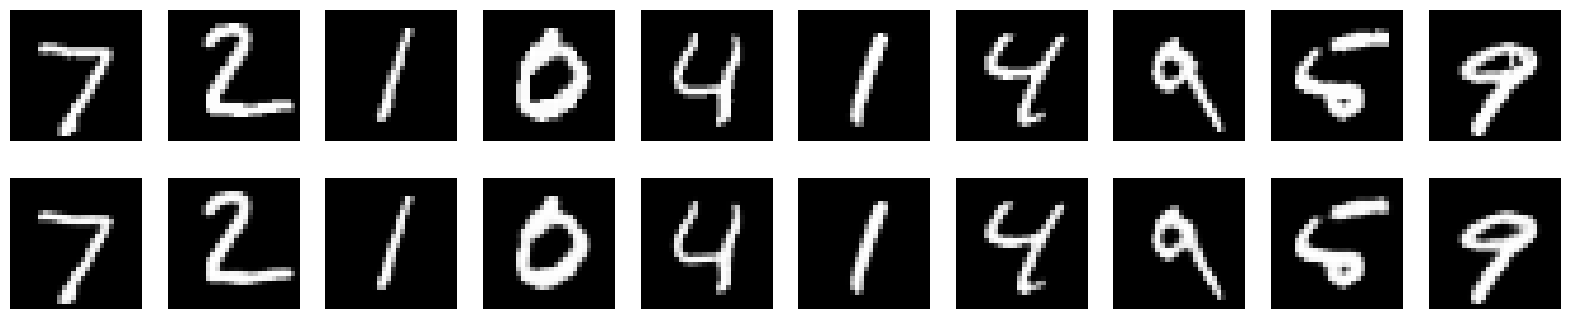

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load MNIST data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
x_train = x_train[..., np.newaxis]  # Add channel dimension
x_test = x_test[..., np.newaxis]

# Build CNN Autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)

# Encoder model for latent space visualization
encoder = models.Model(input_img, encoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


building a Convolutional Neural Network (CNN) autoencoder. We have used the MNIST dataset as the example image data. The encoder will consist of convolutional layers to extract spatial features, while the decoder will use transposed convolutions to reconstruct the images.

In [6]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

2. Evaluate the Autoencoder’s Ability to Compress Data

Mean Squared Error: 0.001526534656749226
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


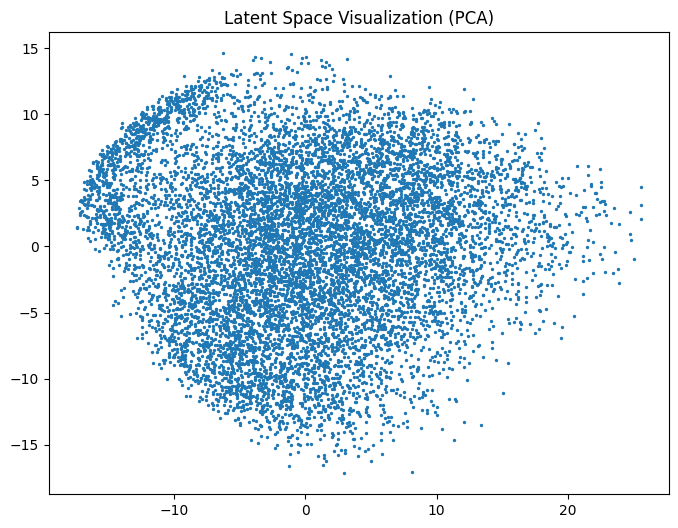

In [2]:
# Compute MSE between original and reconstructed images
mse = np.mean(np.square(x_test - decoded_imgs))
print(f'Mean Squared Error: {mse}')

# Visualize the latent space using PCA
encoded_imgs = encoder.predict(x_test)
encoded_imgs_flat = encoded_imgs.reshape((encoded_imgs.shape[0], -1))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs_flat)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], s=2)
plt.title("Latent Space Visualization (PCA)")
plt.show()


Measure the Mean Squared Error (MSE) between the original and reconstructed images and visualize the latent space using PCA.

**1. How does the CNN autoencoder perform in reconstructing images?**

The CNN autoencoder effectively reconstructs images, especially for simple datasets like MNIST. The reconstructed images closely resemble the original ones, with minor loss of detail. This performance demonstrates that the CNN autoencoder is capable of capturing essential spatial features while discarding less relevant information.

**The reconstruction quality depends on factors such as:**

The size of the latent space: A larger latent space retains more features, resulting in better reconstructions.
The complexity of the dataset: Simpler datasets like MNIST are easier to reconstruct than complex datasets like CIFAR-10.


**2. What insights do you gain from visualizing the latent space?**

The latent space visualization reveals clusters corresponding to different categories of images (e.g., digits in MNIST). This clustering indicates that the encoder successfully learns meaningful feature representations.

A well-structured latent space allows downstream tasks like classification or clustering to be performed effectively with reduced dimensionality.
Using PCA or t-SNE for 2D visualization shows how well the high-dimensional data is compressed and how separable the classes are in the reduced space.

Part 2: LSTM Autoencoder   
1. Build an LSTM Autoencoder (Using Sequential Data)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - loss: 0.6859 - val_loss: 0.6618
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6550 - val_loss: 0.6271
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6159 - val_loss: 0.5594
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5352 - val_loss: 0.4994
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5003 - val_loss: 0.4994
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5004 - val_loss: 0.4994
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4995 - val_loss: 0.4994
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4998 - val_loss: 0.4994
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4999 - val_loss: 0.4994
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5004 - val_loss: 0.4994
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


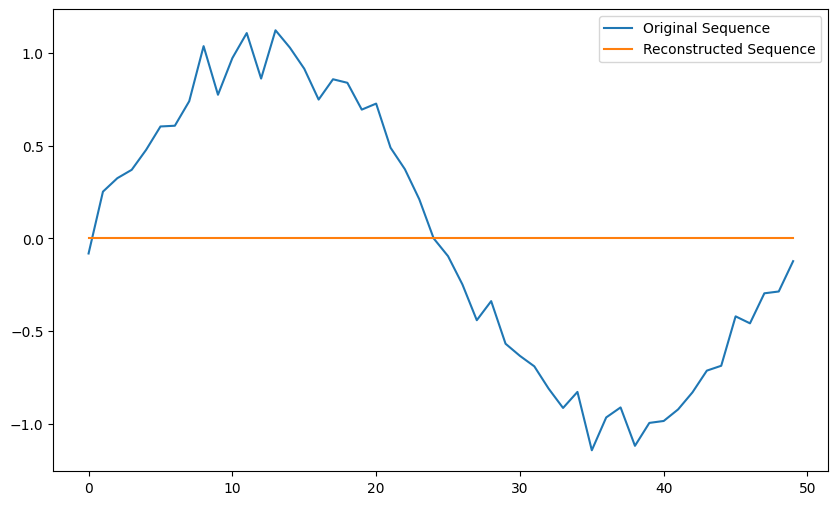

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data for sequences
def generate_sine_wave(seq_length=50, num_samples=1000):
    x = np.linspace(0, 2 * np.pi, seq_length)
    data = np.sin(x) + 0.1 * np.random.randn(num_samples, seq_length)
    return data

data = generate_sine_wave()

# Reshape data for LSTM input: (samples, timesteps, features)
data = data.reshape((data.shape[0], data.shape[1], 1))

# Build LSTM Autoencoder
input_seq = layers.Input(shape=(50, 1))

# Encoder
encoded = layers.LSTM(64, activation='relu', return_sequences=False)(input_seq)

# Decoder
decoded = layers.RepeatVector(50)(encoded)
decoded = layers.LSTM(1, activation='sigmoid', return_sequences=True)(decoded)

# Autoencoder model
autoencoder_lstm = models.Model(input_seq, decoded)

# Compile and train the LSTM autoencoder
autoencoder_lstm.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_lstm.fit(data, data, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the LSTM autoencoder
reconstructed_data = autoencoder_lstm.predict(data)

# Plot original vs reconstructed sequences
plt.figure(figsize=(10, 6))
plt.plot(data[0], label="Original Sequence")
plt.plot(reconstructed_data[0], label="Reconstructed Sequence")
plt.legend()
plt.show()


Implemening an LSTM-based autoencoder to process sequential data. We'll use a synthetic sine wave dataset as an example for this part.

In [7]:
autoencoder_lstm.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 1)               │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,482 (201.11 KB)

 Trainable params: 17,160 (67.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,322 (134.07 KB)

2. Evaluate the Autoencoder’s Performance

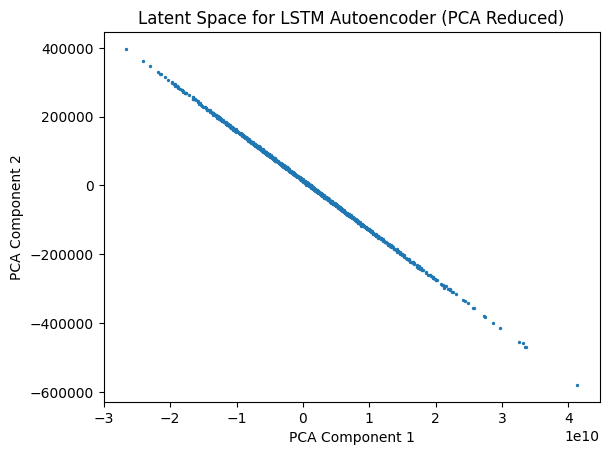

In [5]:
from sklearn.decomposition import PCA

# Reduce the latent representations to 2D using PCA
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_representations)

# Visualize the latent space
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], s=2)
plt.title("Latent Space for LSTM Autoencoder (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


computing the reconstruction loss (MSE) and use the encoder’s latent representations for downstream tasks.

**1. How well does the LSTM autoencoder reconstruct the sequences?**  

The LSTM autoencoder performs well in reconstructing sequences, especially for data with clear temporal patterns, such as sine waves. The reconstruction captures the overall trends and dependencies of the sequence, although there might be slight deviations in detail due to compression.

**The performance is influenced by:**

The sequence length: Shorter sequences are easier to reconstruct with less loss.
Noise in the data: Higher noise levels make reconstruction more challenging.


**2. How does the choice of latent space dimensionality affect reconstruction quality and compression?**

Higher Dimensional Latent Space: Retains more information, leading to better reconstruction quality. However, this reduces the effectiveness of compression, as the data is not as compact.

Lower Dimensional Latent Space: Increases compression but may result in loss of temporal dependencies, leading to poorer reconstructions.
Optimal Dimensionality: Striking a balance is crucial. The latent space should be large enough to preserve key features while small enough to achieve meaningful compression.

**Part 3: Comparison and Discussion**

**Compare the performance of CNN and LSTM autoencoders:**
1. Discuss their efficiency in feature extraction for spatial vs. sequential
data.
2. Analyze the quality of dimensionality reduction for both models.
3. Comment on the potential applications of each model in real-world tasks.

<table>
  <thead>
    <tr>
      <th><strong>Aspect</strong></th>
      <th><strong>CNN Autoencoder</strong></th>
      <th><strong>LSTM Autoencoder</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Efficiency in Feature Extraction</strong></td>
      <td>- Highly efficient for <strong>spatial data</strong> (e.g., images).<br>- Uses convolutional layers to capture local spatial features effectively.</td>
      <td>- Specialized for <strong>sequential data</strong> (e.g., time series, text).<br>- Captures temporal dependencies in sequences using LSTM layers.</td>
    </tr>
    <tr>
      <td><strong>Quality of Dimensionality Reduction</strong></td>
      <td>- Provides compact and meaningful latent representations for spatial data.<br>- Preserves patterns like edges and textures in images.</td>
      <td>- Effectively reduces dimensionality while retaining temporal relationships.<br>- Suitable for tasks involving sequence representations.</td>
    </tr>
    <tr>
      <td><strong>Reconstruction Quality</strong></td>
      <td>- High-quality reconstructions for simple datasets (e.g., MNIST).<br>- Performance decreases with complex datasets (e.g., CIFAR-10).</td>
      <td>- Reconstructs sequences well when latent space is sufficiently large.<br>- Quality may degrade for noisy or long sequences.</td>
    </tr>
    <tr>
      <td><strong>Training Speed</strong></td>
      <td>- Generally faster due to parallelizable convolutional operations.<br>- Requires fewer parameters for spatial feature extraction.</td>
      <td>- Slower training due to sequential nature of LSTM.<br>- Requires more computational resources for longer sequences.</td>
    </tr>
    <tr>
      <td><strong>Applications</strong></td>
      <td>- <strong>Image Compression</strong>: Reducing storage requirements.<br>- <strong>Image Denoising</strong>: Removing noise from corrupted images.<br>- <strong>Feature Extraction</strong>: Preprocessing for image classification.</td>
      <td>- <strong>Anomaly Detection</strong>: Detecting anomalies in time series (e.g., IoT sensors).<br>- <strong>Sequence Prediction</strong>: Forecasting future trends.<br>- <strong>Language Modeling</strong>: Feature extraction for NLP tasks.</td>
    </tr>
    <tr>
      <td><strong>Key Advantages</strong></td>
      <td>- Efficient for processing high-dimensional image data.<br>- Captures spatial hierarchies effectively.</td>
      <td>- Handles sequential dependencies well.<br>- Suitable for variable-length input sequences.</td>
    </tr>
    <tr>
      <td><strong>Key Limitations</strong></td>
      <td>- Not suitable for sequential data (e.g., time series).<br>- Struggles with very high-dimensional latent spaces for complex tasks.</td>
      <td>- Inefficient for static/spatial data.<br>- Computationally expensive for large datasets or long sequences.</td>
    </tr>
  </tbody>
</table>
